In [1]:
import torch
from PIL import Image

In [ ]:
compressor = "sz3"
bound = "1E-7"
img_sz3 = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")

compressor = "zfp"
bound = "1E-7"
img_sz3 = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")
#img.save(fp=f"{compressor}_{bound}.png")
#img

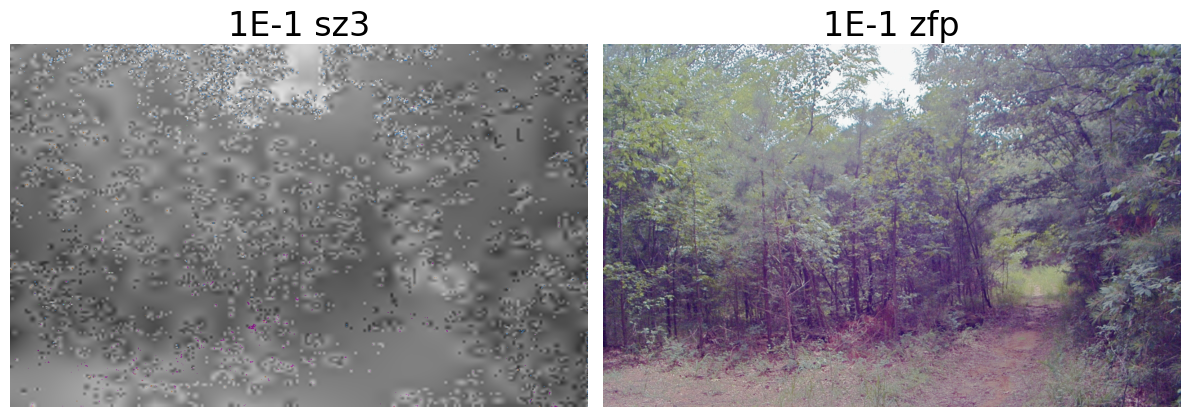

In [3]:
import matplotlib.pyplot as plt

bound = "1E-1"

compressor = "sz3"
img_sz3 = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")

compressor = "zfp"
img_zfp = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first image
axes[0].imshow(img_sz3)
axes[0].set_title(f'{bound} sz3', fontsize=24)
axes[0].axis('off')  # Turn off the axis

# Plot the second image
axes[1].imshow(img_zfp)
axes[1].set_title(f'{bound} zfp', fontsize=24)
axes[1].axis('off')  # Turn off the axis

# Display the images
plt.tight_layout()
#plt.savefig('sz3VsZfp.png', bbox_inches='tight')
plt.show()

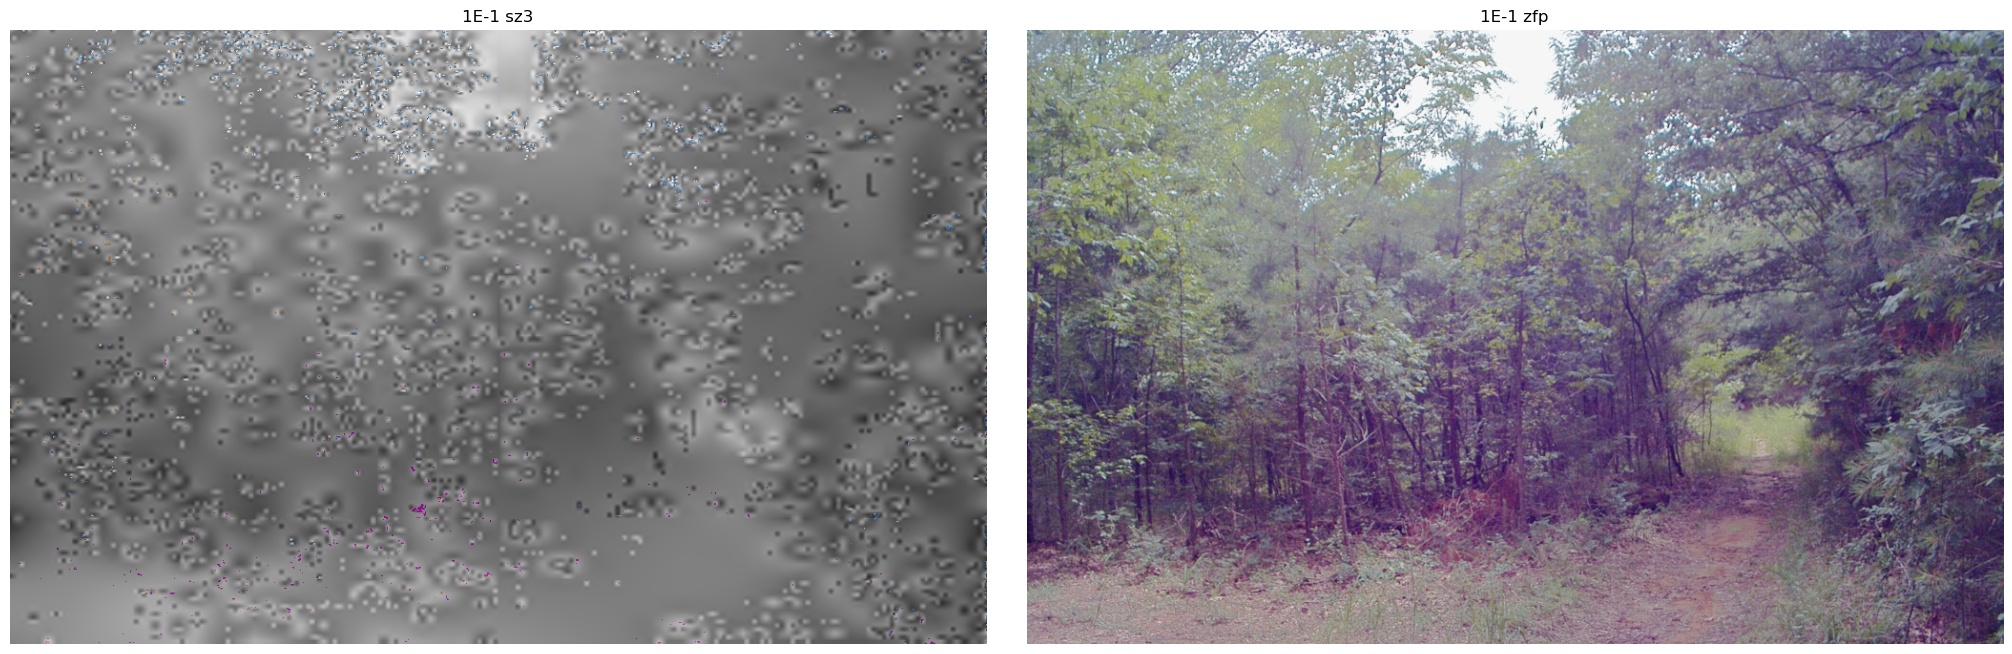

In [2]:
import matplotlib.pyplot as plt

bound = "1E-1"

compressor = "sz3"
img_sz3 = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")

compressor = "zfp"
img_zfp = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")

# Assuming image1 and image2 are PIL images
width1, height1 = img_sz3.size
width2, height2 = img_zfp.size

dpi = 100  # Adjust this if needed

fig_width = (width1 + width2) / dpi
fig_height = height1 / dpi

fig, axes = plt.subplots(1, 2, figsize=(fig_width, fig_height), dpi=dpi)

axes[0].imshow(img_sz3)
axes[0].set_title(f'{bound} sz3')
axes[0].axis('off')

axes[1].imshow(img_zfp)
axes[1].set_title(f'{bound} zfp')
axes[1].axis('off')

plt.tight_layout()
plt.savefig(f'{bound}_sz3VsZfp.png', dpi=dpi, bbox_inches='tight')
plt.show()


In [5]:
# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nimbus Roman']

In [ ]:
import matplotlib.pyplot as plt

bound = "1E-1"
bounds = ["1E-1", "1E-3", "1E-7"]

compressor = "sz3"
img_sz3 = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")
sz3_imgs = []
for bound in bounds:
    sz3_imgs.append(Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png"))

compressor = "zfp"
zfp_imgs = []
for bound in bounds:
    zfp_imgs.append(Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png"))

img_zfp = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.png")

# Assuming image1 and image2 are PIL images
width1, height1 = img_sz3.size
width2, height2 = img_zfp.size

dpi = 100  # Adjust this if needed

fig_width = (width1 + width2) / dpi
fig_height = (height1 * len(bounds)) / dpi

fig, axes = plt.subplots(len(bounds), 2, figsize=(fig_width, fig_height), dpi=dpi)

for idx, bound in enumerate(bounds):
    axes[idx][0].imshow(sz3_imgs[idx])
    axes[idx][0].set_title(f'{bound} sz3', fontsize=48)
    axes[idx][0].axis('off')
    
    axes[idx][1].imshow(zfp_imgs[idx])
    axes[idx][1].set_title(f'{bound} zfp', fontsize=48)
    axes[idx][1].axis('off')

#plt.tight_layout()
#plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between images
plt.tight_layout(pad=0.5)  # Tighten layout and remove padding
plt.savefig('sz3VsZfp.png', dpi=dpi, bbox_inches='tight')
#plt.show()

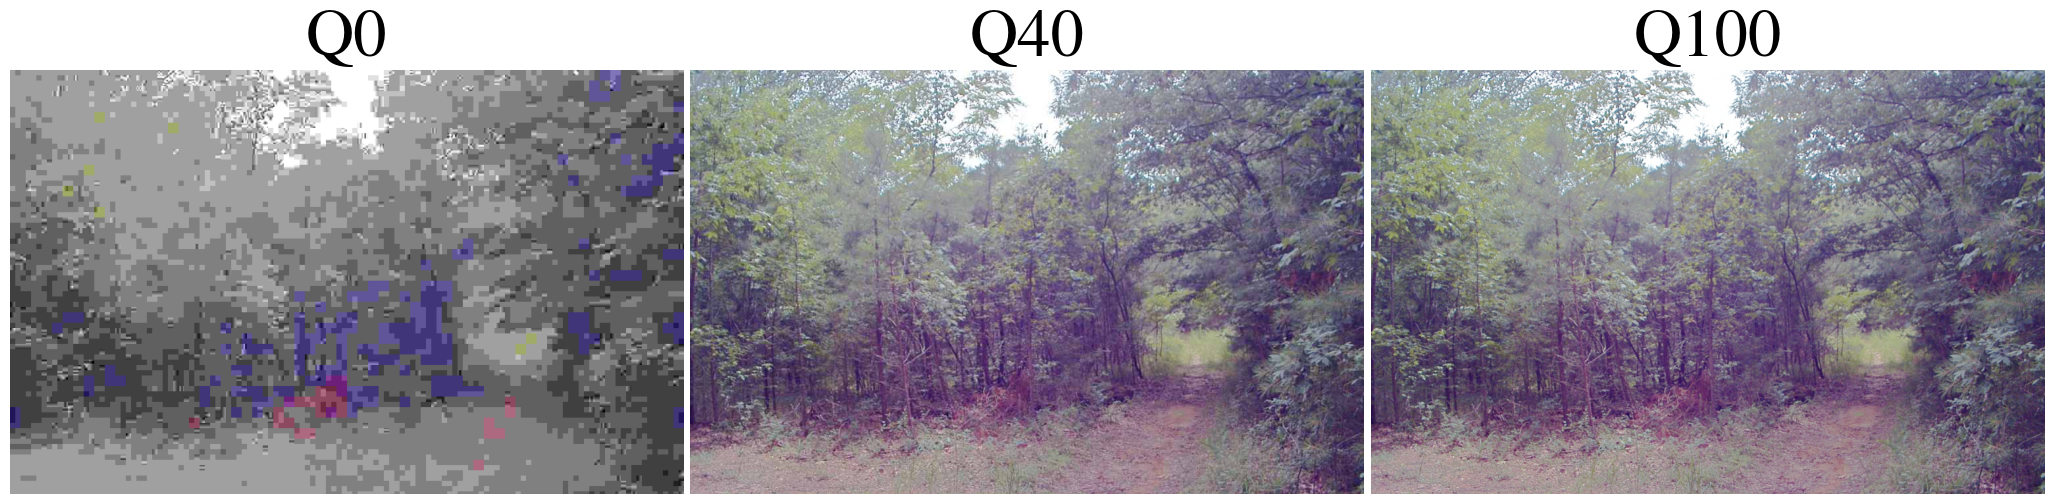

In [10]:
import matplotlib.pyplot as plt

bounds = ["Q0", "Q40", "Q100"]
bound = "Q0"

compressor = "jpeg"
img = Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.jpg")

imgs = []
for bound in bounds:
    imgs.append(Image.open(f"/scratch/aniemcz/cavsMiniLossyCompressorsV2/{compressor}/{bound}/Train/rgb/img_1.jpg"))

# Assuming image1 and image2 are PIL images
width1, height1 = img.size

dpi = 100  # Adjust this if needed

fig_width = (width1 + width2) / dpi
fig_height = height1 / dpi

fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_height), dpi=dpi)


for idx, bound in enumerate(bounds):
    axes[idx].imshow(imgs[idx])
    axes[idx].set_title(f'{bound}', fontsize=48)
    axes[idx].axis('off')

plt.tight_layout()
plt.tight_layout(pad=0.5)  # Tighten layout and remove padding
plt.savefig(f'jpeg_compression_visual.png', dpi=dpi, bbox_inches='tight')
plt.show()


In [39]:
#MANY IMAGES
# USAGE
# python predict.py
# import the necessary packages
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import torch
import cv2
import os
from PIL import Image 

def prepare_plot(origImage, predMask, origMask, origImageActual, numClasses=4):
    # initialize our figure
    figure, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    norm = mcolors.Normalize(vmin=0, vmax=numClasses-1) #needed so original and predicted mask have same color for each integer index
    # plot the original image, its mask, and the predicted mask
    ax[0].imshow(origImage)
    ax[1].imshow(predMask, cmap="rainbow", norm=norm)
    origMaskImg = ax[2].imshow(origMask, cmap="rainbow", norm=norm)
    ax[3].imshow(origImageActual)
    # set the titles of the subplots
    ax[0].set_title("Image")
    ax[1].set_title("Predicted Mask")
    ax[2].set_title("Original Mask")
    ax[3].set_title("Original Image")
    # set the layout of the figure and display it
    # Add colorbar
    cbar = figure.colorbar(origMaskImg, ax=ax, orientation='vertical', fraction=0.01, pad=0.03)
    cbar.set_ticks(range(numClasses))
    cbar.set_ticklabels([str(i) for i in range(numClasses)])
    #figure.tight_layout()
    figure.show()
def make_predictions(model, dataLoader):
    # set model to evaluation mode
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(tqdm(dataLoader)):
            # load the image from disk, swap its color channels, cast it
            # to float data type, and scale its pixel values
            X, y = batch # here 's' is the name of the file stored in the root directory
            X, y = X.to('cuda'), y.to('cuda')
            print("Input shape y is {}".format(y.shape))
            print("y unique {}".format(y.unique()))
            toPilImage = transforms.ToPILImage()
            image = toPilImage(X.squeeze().to('cpu'))
            image_actual = dataLoader.dataset.get_raw_image(idx) #returns as pil image
            origMask = y.squeeze().to('cpu')
            print("origMask has these unique integers {}".format(np.unique( np.array(origMask) ) ) )
            print("Input shape X is {}".format(X.shape))
            predictions = model(X) #outputs a tensor of shape torch.Size([1, 4, 1024, 672]) aka torch.Size([batch_size, num_classes, height, width])
            print("unique int for pred mask is {}".format(predictions.unique()))
            print("Output shape is {}".format(predictions.shape))

            #The basic idea of the softmax is that we will have our prediction
            #The prediction outputs a mask for each class where 
            #predictions = torch.nn.functional.softmax(predictions, dim=1)
            pred_labels = torch.argmax(predictions, dim=1) 
            pred_labels = pred_labels.float()

            # Remapping the labels
            pred_labels = pred_labels.to('cpu')

            # Resizing predicted images too original size
            #pred_labels = transforms.Resize((1024, 2048))(pred_labels)
            print("Pred_labels shape is {}".format(pred_labels.shape))
            flat = torch.flatten(pred_labels)
            test = flat.unique()
            print("Number of unique label ids is {}".format(len(test)) )
            break #so it only iterates once          
    prepare_plot(image, pred_labels.squeeze(), origMask, image_actual)
# load the image paths in our testing file and randomly select 10
# image paths
print("[INFO] loading up test image paths...")

# load our model from disk and flash it to the current device
print("[INFO] load up model...")

[INFO] loading up test image paths...
[INFO] load up model...


In [48]:
# Custom Dataset
INPUT_IMAGE_HEIGHT = 1024
INPUT_IMAGE_WIDTH = 672
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image = t(image)
            target = t(target)
        target = torch.tensor(np.array(target), dtype=torch.int64)
        
        color_jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        image = color_jitter(image)
        image = transforms.ToTensor()(image)
        rand_erase = transforms.RandomErasing(p=0.1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
        image = rand_erase(image)
        return image, target

class SegmentationDataset(Dataset):
    def __init__(self, imgs_dir, masks_dir, transforms=None):
        self.imgs_dir = imgs_dir
        self.masks_dir = masks_dir
        self.transforms = transforms
        self.image_mask_pairs = self._collect_image_mask_pairs()
        print(f"Matched {len(self.image_mask_pairs)} image-mask pairs.")

    def _collect_image_mask_pairs(self):
        image_mask_pairs = []
        image_dir = self.imgs_dir
        mask_dir = self.masks_dir
        
        images = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])
        masks = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])

        mask_dict = {os.path.basename(mask).split('_')[1].replace('.png', ''): mask for mask in masks}
        for img in images:
            key = os.path.basename(img).split('_')[1].replace('.png', '')
            if key in mask_dict:
                image_mask_pairs.append((img, mask_dict[key]))
            else:
                print(f"No matching mask for image: {img}")

        return image_mask_pairs

    def __len__(self):
        return len(self.image_mask_pairs)

    def __getitem__(self, idx):
        img_path, mask_path = self.image_mask_pairs[idx]
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")
        if self.transforms:
            image, mask = self.transforms(image, mask)
        return image, mask
    
    def get_raw_image(self, idx):
        img_path, _ = self.image_mask_pairs[idx]
        image = Image.open(img_path).convert("RGB")
        return image

# Transformation definition
transform = Compose([transforms.Resize((INPUT_IMAGE_HEIGHT, INPUT_IMAGE_WIDTH), interpolation=Image.NEAREST)])

# Creating dataset and dataloader instances
root_dir = "/scratch/aniemcz/cavsMiniLossyCompressorsV2/"
test_imgs_dir = os.path.join(root_dir, "sz3/1E-1/Test/rgb")
test_masks_dir = os.path.join(root_dir, "mixed/Test/annos/int_maps")

testDS = SegmentationDataset(imgs_dir=test_imgs_dir, masks_dir=test_masks_dir, transforms=transform)

test_loader = DataLoader(testDS, batch_size=1, shuffle=False)

Matched 544 image-mask pairs.


In [ ]:
import segmentation_models_pytorch as smp
from tqdm import tqdm

save_dict_path = "models/sz3/1E-1/model_epoch_120_aug.pth"

unet = smp.Unet(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=4).cuda()
state_dict = torch.load(save_dict_path)
unet.load_state_dict(state_dict)

unet.eval()

trainLoaderEval = DataLoader(testDS, shuffle=True,
    batch_size=1, pin_memory=True,
    )
make_predictions(unet, trainLoaderEval)